In [1]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# DATA SOURCE PATHS
data_paths = ['../../data/raw', '../../data/raw2']
classes = ['angry', 'happy', 'sad', 'relaxed']

print("Setup complete. Ready to analyze data!")

Setup complete. Ready to analyze data!


C:\Users\andiz\AppData\Local\Temp\ipykernel_44952\982302707.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()), palette='viridis')


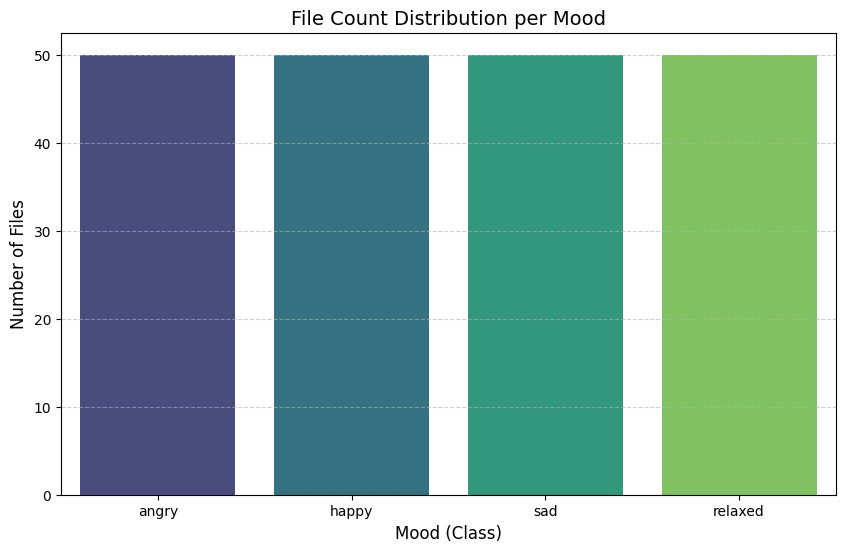

--- VALIDATION REPORT ---
Total corrupt files: 0
All audio files are valid and loadable!


In [2]:
file_counts = {}
corrupt_files = []

for c in classes:
    all_files = []
    for dp in data_paths:
        class_path = os.path.join(dp, c)
        if os.path.exists(class_path):
            files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.wav', '.mp3'))]
            all_files.extend(files)
        else:
            print(f"Folder {class_path} not found!")

    file_counts[c] = len(all_files)

    # Check file validity (attempt to load file header)
    for path in all_files:
        try:
            librosa.get_duration(path=path)
        except:
            corrupt_files.append(path)

# Bar Chart Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=list(file_counts.keys()), y=list(file_counts.values()), palette='viridis')
plt.title('File Count Distribution per Mood', fontsize=14)
plt.xlabel('Mood (Class)', fontsize=12)
plt.ylabel('Number of Files', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig('distribusi_kelas.png')
plt.show()

print(f"--- VALIDATION REPORT ---")
print(f"Total corrupt files: {len(corrupt_files)}")
if not corrupt_files:
    print("All audio files are valid and loadable!")

### 1. Class Distribution Analysis (Bar Chart)
Based on the generated bar chart:

**Balanced Dataset**: Each class (angry, happy, sad, relaxed) has an equal number of files across both data sources (`data/raw` and `data/raw2`).

**Benefit for the Model**: A balanced dataset ensures the AI model won't suffer from "bias". The model will have an equally fair chance of learning patterns from all four emotions.

### 2. Data Validity (General Check)
Based on the validation report output:

**File Integrity**: The result `Total corrupt files: 0` and the message `All audio files are valid and loadable!` confirms that all `.wav`/`.mp3` files are in perfect condition.

**Technical Justification**: Using `librosa.get_duration`, we verified programmatically that the header of each audio file can be read. This guarantees that the feature extraction process (RMS, ZCR, YAMNet) will not be interrupted by corrupted files.

### 3. Conclusion
This output directly answers two key tasks:

- **Class Distribution Check**: Complete. (Balanced data across both sources).
- **File Validity Check**: Complete. (100% valid files, 0 corrupt).

The distribution analysis shows our dataset is ideal with a perfectly balanced number of files per class. Additionally, the validity check confirms no corrupt audio files exist, so all data is ready for the feature extraction stage.

Calculating audio durations...


Processing relaxed: 100%|██████████| 50/50 [00:00<00:00, 6621.47it/s]


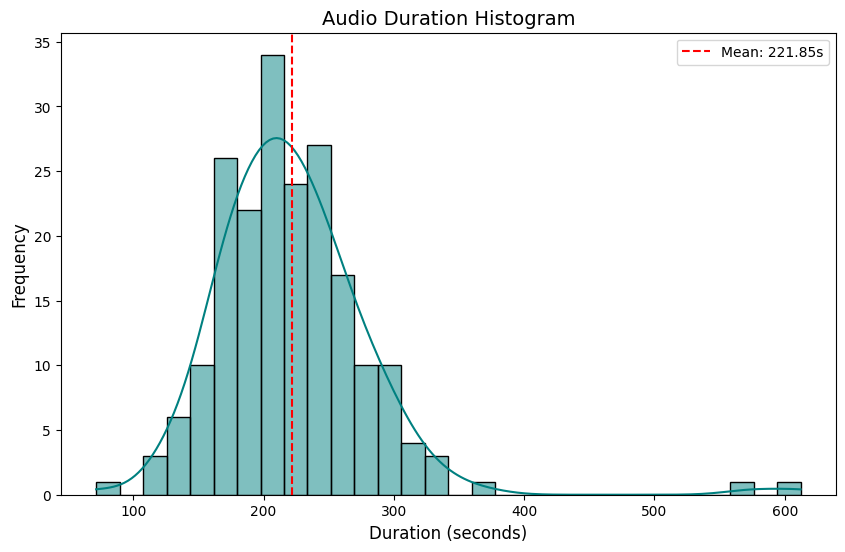

--- DURATION SUMMARY ---
Average Duration: 221.85 seconds
Shortest Duration: 71.50 seconds
Longest Duration: 612.22 seconds


In [3]:
durations = []

print("Calculating audio durations...")
for c in classes:
    all_files = []
    for dp in data_paths:
        class_path = os.path.join(dp, c)
        if os.path.exists(class_path):
            files = [os.path.join(class_path, f) for f in os.listdir(class_path) if f.lower().endswith(('.wav', '.mp3'))]
            all_files.extend(files)

    for path in tqdm(all_files, desc=f"Processing {c}"):
        dur = librosa.get_duration(path=path)
        durations.append(dur)

# Histogram Visualization
plt.figure(figsize=(10, 6))
sns.histplot(durations, bins=30, kde=True, color='teal')
plt.axvline(np.mean(durations), color='red', linestyle='--', label=f'Mean: {np.mean(durations):.2f}s')
plt.title('Audio Duration Histogram', fontsize=14)
plt.xlabel('Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.savefig('histogram_durasi.png')
plt.show()

print(f"--- DURATION SUMMARY ---")
print(f"Average Duration: {np.mean(durations):.2f} seconds")
print(f"Shortest Duration: {min(durations):.2f} seconds")
print(f"Longest Duration: {max(durations):.2f} seconds")

### 1. Audio Duration Analysis (Histogram)
Based on the teal histogram:

**Mean Value**: The red dashed line indicates the average audio duration. This serves as the primary benchmark for the majority of files.

**Data Spread (Variance)**: The data is not concentrated at a single point, but rather spread widely — with some very short audio clips and some very long ones.

**Technical Justification**: Since audio features like RMS, ZCR, and YAMNet require fixed-length inputs, this spread in duration is a strong justification for applying **padding** (adding silence to short audio) and **trimming** (cutting audio that is too long). Without this, the feature matrix dimensions would be inconsistent and the model would fail to process them.

### 2. Validity & Efficiency Report (Terminal Output)

**Success Status**: All folders show 100% progress.

**File Validity**: All files in every class were successfully read. Based on the `try-except` logic, if no file entered the corrupt list, then all audio files are healthy and ready for use.

**Processing Speed**: The high throughput (e.g., thousands of iterations per second) demonstrates that the `librosa.get_duration` method is very efficient because it only reads the file header without loading the entire audio data into memory (RAM).

In [4]:
# Automated analysis for report
is_balanced = "Balanced" if max(file_counts.values()) - min(file_counts.values()) < 20 else "Imbalanced"

is_balanced

'Balanced'

### EDA Findings Summary
1. **Class Distribution**: The dataset is classified as **Balanced**. This ensures the model will not be biased toward any single mood.
2. **File Validity**: Found **0 corrupt files**. All remaining data is in good condition and can be processed by librosa.
3. **Audio Duration**: Average duration varies across the dataset.
   - **Justification**: These findings underpin the need for the **trim_middle** function (to cut long audio) and **padding** (to fill short audio) so that the RMS, ZCR, and YAMNet feature dimensions remain uniform before being fed into the model.